## Analyzing the backtest results

In [1]:
import logging
import os
import re
from kiteconnect import KiteConnect
from dotenv import load_dotenv
load_dotenv()
import bs_threading
from matplotlib import pyplot
import importlib
import time
from datetime import datetime, timedelta, timezone
import dateutil
import pandas as pd
importlib.reload(bs_threading)
from bs_threading import bs_threadify, bs_make_throttle_ready_func, bs_multiprocessify,f


In [2]:
# load all the stocks
# we do it together to the final of the sytem skk

INPUT_KITE_HISTORICAL_DIR = "input/kite_historical"
INPUT_KITE_INSTRUMENTS_DIR = "input/kite_instruments"
BACKTEST_DIR = "output/bsstonks_backtest"

In [13]:
for backtest_strategy_dir in os.listdir(BACKTEST_DIR):
    print(backtest_strategy_dir)

ema_cross_5_80_2015
ema_overlap_20_50_15min
ema_overlap_20_50_day
ema_overlap_5_100_15min
harsh_ema_cross_20_60_2015
harsh_ema_cross_5_80_2015
ma_overlap_5_100_15min
rsi_45_15minute
rsi_45_15minute_from_2019
rsi_45_day
rsi_BNF_45_15minute_from_2019
rsi_BNKNIFTY_comp_45_15minute_from_2008
rsi_NIFTY50_45_15minute_from_2008
rsi_NIFTY50_45_15minute_from_2019
rsi_niftybees_45_15minute_from_2008
rsi_niftybees_48_15minute_from_2008
rsi_NIFTY_45_15minute_from_2019
soyeb_nifty50_2008onward
soyeb_tcs_2008onward
soyeb_tcs_2008onward_ma_check


In [16]:
backtest_strategy_dir = "harsh_ema_cross_20_60_2015"
strategy_symbol_summary = []
for backtest_symbol_file in os.listdir(os.path.join(BACKTEST_DIR,backtest_strategy_dir)):
    print("---------------------")
    print(backtest_symbol_file)
    df = pd.read_csv(os.path.join(BACKTEST_DIR, backtest_strategy_dir, backtest_symbol_file))
    start_balance = df[df['buysell']=='sell'].iloc[0]['balance']
    end_balance = df[df['buysell']=='sell'].iloc[-1]['balance']
    pnl = (end_balance-100000)
    pnl_multiplier = pnl/100000
    print(pnl_multiplier)
    start_date = dateutil.parser.parse(df['date'].iloc[0])
    end_date = dateutil.parser.parse(df['date'].iloc[-1])
    span_days = (end_date-start_date).days
    
    pnl_percentage_multiplier_per_year = (pnl_multiplier-1)*100/span_days*365
    strategy_symbol_summary.append({
        'symbol':backtest_symbol_file,
        'p&l % per year': pnl_percentage_multiplier_per_year,
        'p&l %':(pnl_multiplier-1)*100,
        'p&l': pnl, 
        'trades': df.shape[0]/2
    })
#     print("100000", start_balance, end_balance)
#     print("P&L --> ", )


---------------------
114433_TATASTLBSL_EQ_NSE_NSE_day.csv
2.171976280482552
---------------------
136330244_TCS_EQ_BSE_BSE_day.csv
0.7593011988209921
---------------------
185345_TATACOFFEE_EQ_NSE_NSE_day.csv
1.015231290659509
---------------------
2006529_NETF_EQ_NSE_NSE_day.csv
0.04877604883432927
---------------------
2031873_TATASTLLP-BE_EQ_NSE_NSE_day.csv
2.0364521448137256
---------------------
2293249_TTML-BE_EQ_NSE_NSE_day.csv
22.66502506918145
---------------------
2953217_TCS_EQ_NSE_NSE_day.csv
0.7791814522070813
---------------------
3322369_NPBET_EQ_NSE_NSE_day.csv
0.4655773744754991
---------------------
414977_TATAINVEST_EQ_NSE_NSE_day.csv
1.099009303347561
---------------------
4343041_TATAMTRDVR_EQ_NSE_NSE_day.csv
1.1709189271120053
---------------------
871681_TATACHEM_EQ_NSE_NSE_day.csv
2.5240278340732316
---------------------
873217_TATAELXSI_EQ_NSE_NSE_day.csv
2.636038728301886
---------------------
876289_TATAMETALI_EQ_NSE_NSE_day.csv
16.411617722379756
----------

In [17]:
print("Strategy:", backtest_strategy_dir)
df_symbol_summary = pd.DataFrame(strategy_symbol_summary)
print(df_symbol_summary.columns)
df_symbol_summary.sort_values(by=["p&l % per year"], ascending=False).head(50)


Strategy: harsh_ema_cross_20_60_2015
Index(['symbol', 'p&l % per year', 'p&l %', 'p&l', 'trades'], dtype='object')


,symbol,p&l % per year,p&l %,p&l,trades
5,2293249_TTML-BE_EQ_NSE_NSE_day.csv,367.118577,2166.502507,2.266503e+06,41.5
12,876289_TATAMETALI_EQ_NSE_NSE_day.csv,287.588981,1541.161772,1.641162e+06,33.0
16,895745_TATASTEEL_EQ_NSE_NSE_day.csv,119.549157,642.617660,7.426177e+05,35.0
17,952577_TATACOMM_EQ_NSE_NSE_day.csv,99.627361,569.650141,6.696501e+05,32.5
13,877057_TATAPOWER_EQ_NSE_NSE_day.csv,82.151575,440.692556,5.406926e+05,32.0
11,873217_TATAELXSI_EQ_NSE_NSE_day.csv,31.545385,163.603873,2.636039e+05,23.0
10,871681_TATACHEM_EQ_NSE_NSE_day.csv,26.577647,152.402783,2.524028e+05,38.5
0,114433_TATASTLBSL_EQ_NSE_NSE_day.csv,23.857855,117.197628,2.171976e+05,36.0
14,878593_TATACONSUM_EQ_NSE_NSE_day.csv,18.286990,101.605522,2.016055e+05,36.0
4,2031873_TATASTLLP-BE_EQ_NSE_NSE_day.csv,17.369377,103.645214,2.036452e+05,41.0


---------------------
114433_TATASTLBSL_EQ_NSE_NSE_day.csv
losses (16,)
profit (19,)


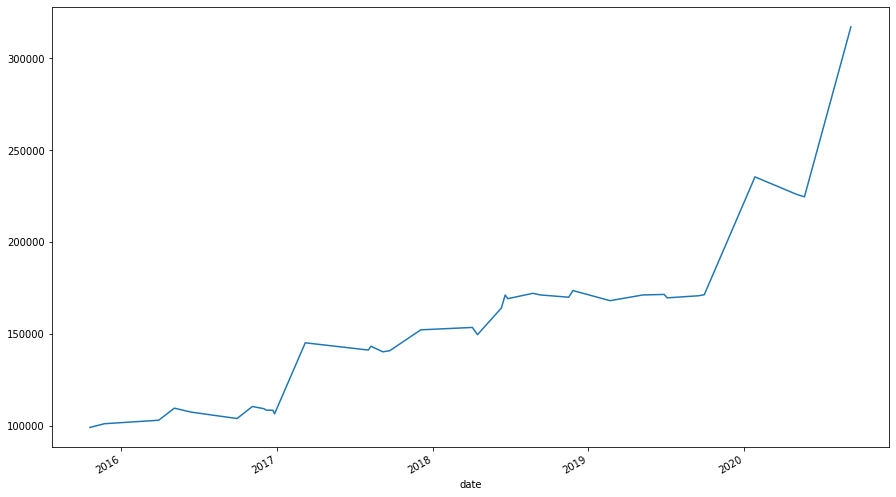

---------------------
136330244_TCS_EQ_BSE_BSE_day.csv
losses (12,)
profit (14,)


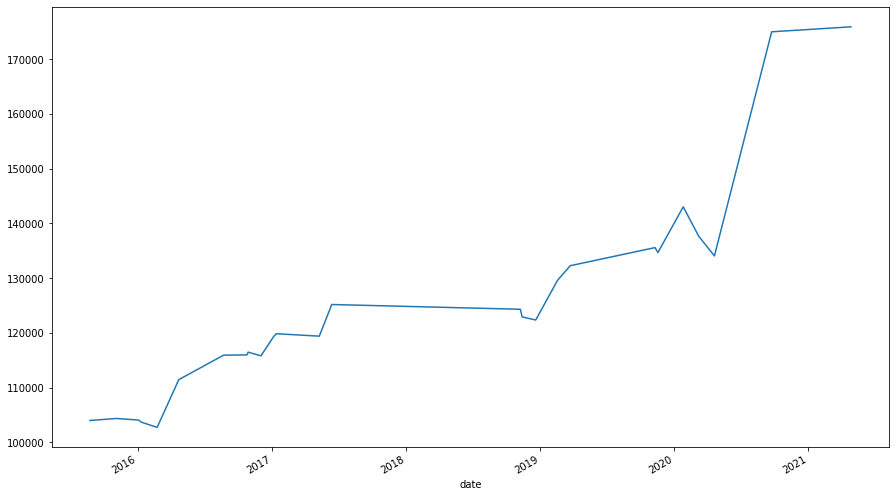

---------------------
185345_TATACOFFEE_EQ_NSE_NSE_day.csv
losses (16,)
profit (20,)


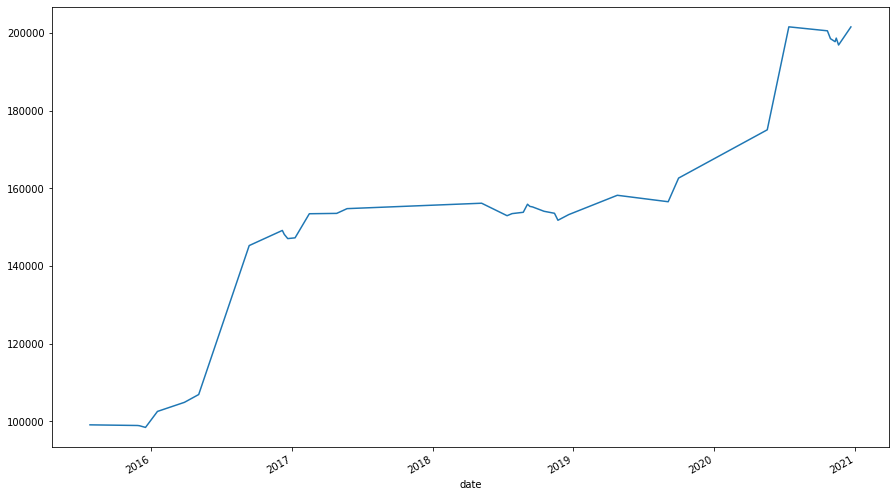

---------------------
2006529_NETF_EQ_NSE_NSE_day.csv
losses (3,)
profit (2,)


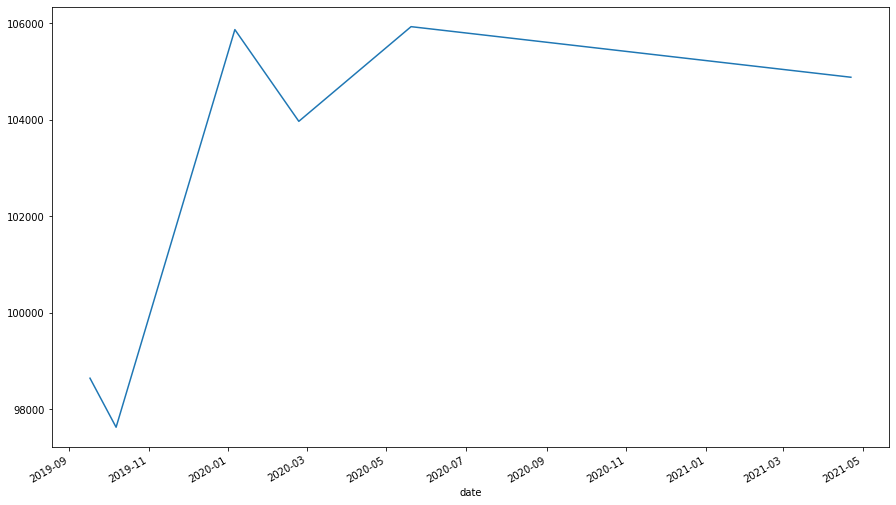

---------------------
2031873_TATASTLLP-BE_EQ_NSE_NSE_day.csv
losses (13,)
profit (27,)


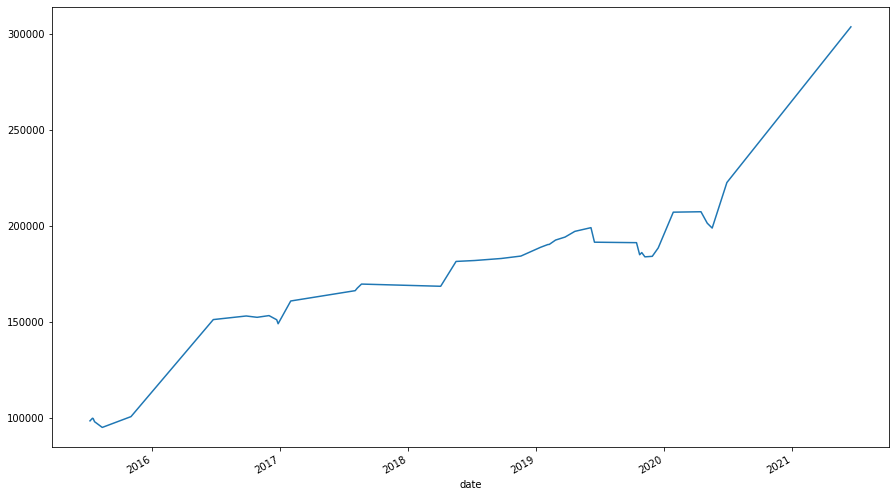

---------------------
2293249_TTML-BE_EQ_NSE_NSE_day.csv
losses (12,)
profit (23,)


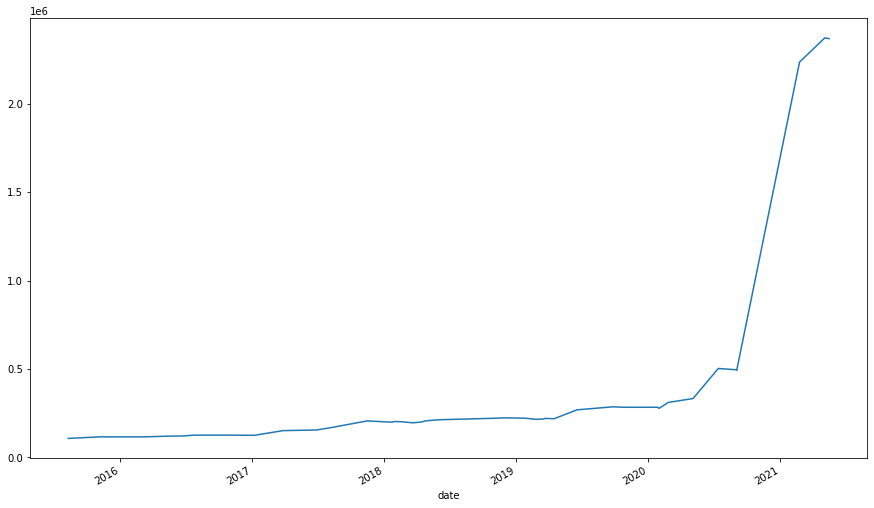

---------------------
2953217_TCS_EQ_NSE_NSE_day.csv
losses (12,)
profit (15,)


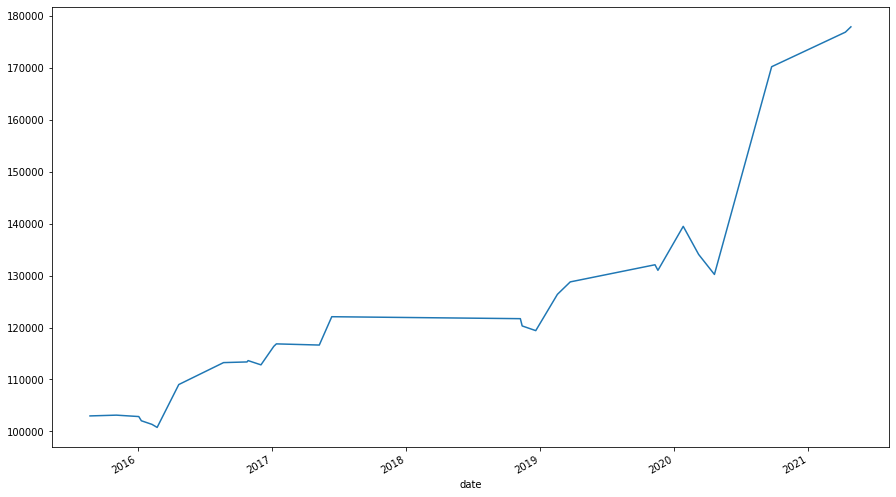

---------------------
3322369_NPBET_EQ_NSE_NSE_day.csv
losses (4,)
profit (2,)


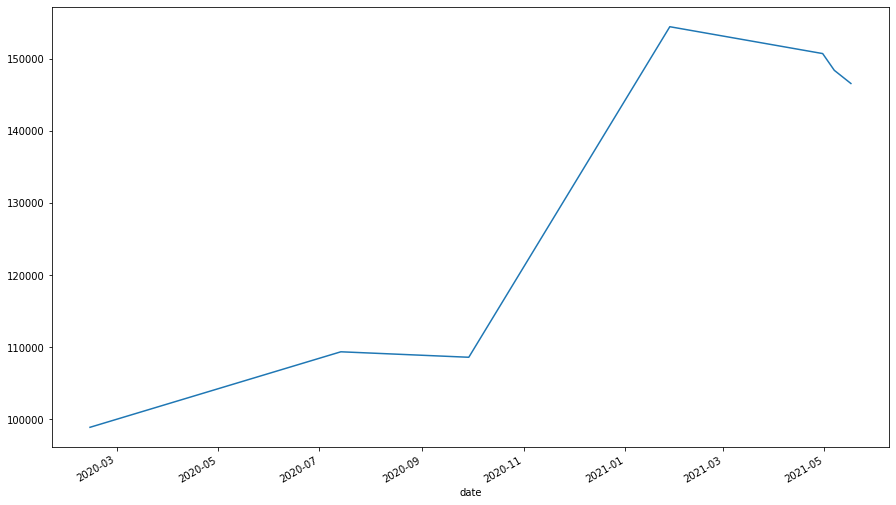

---------------------
414977_TATAINVEST_EQ_NSE_NSE_day.csv
losses (15,)
profit (18,)


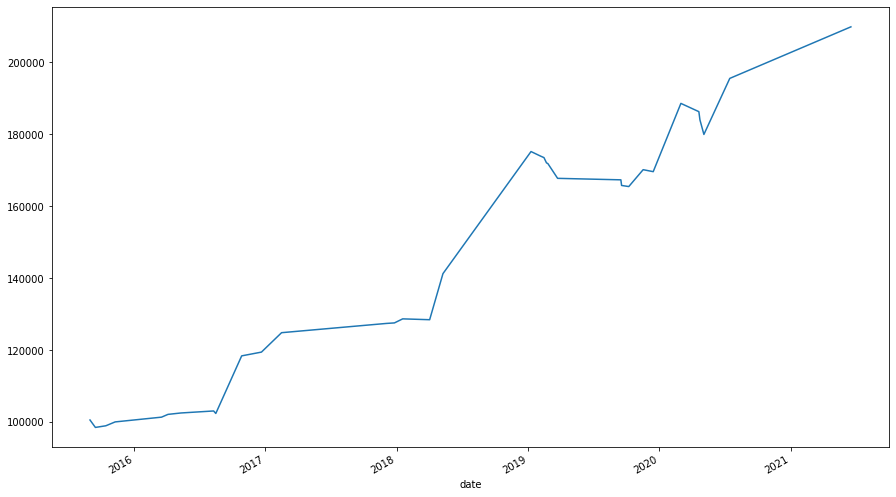

---------------------
4343041_TATAMTRDVR_EQ_NSE_NSE_day.csv
losses (25,)
profit (20,)


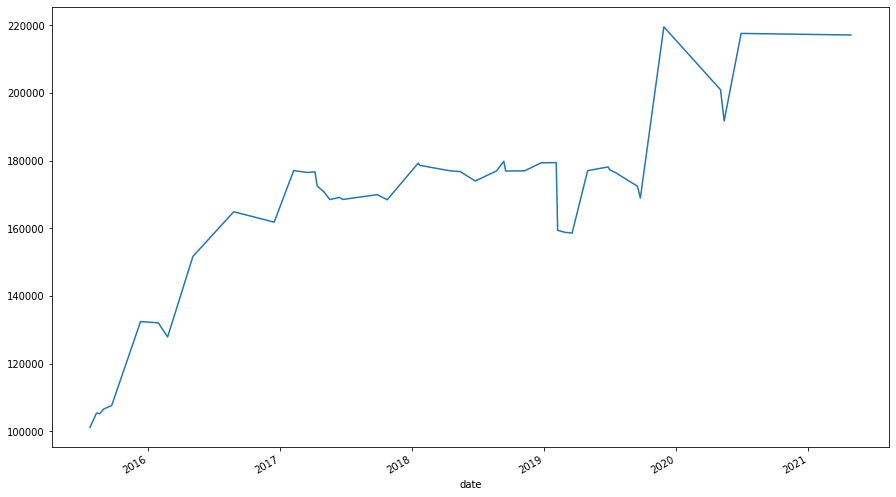

---------------------
871681_TATACHEM_EQ_NSE_NSE_day.csv
losses (13,)
profit (24,)


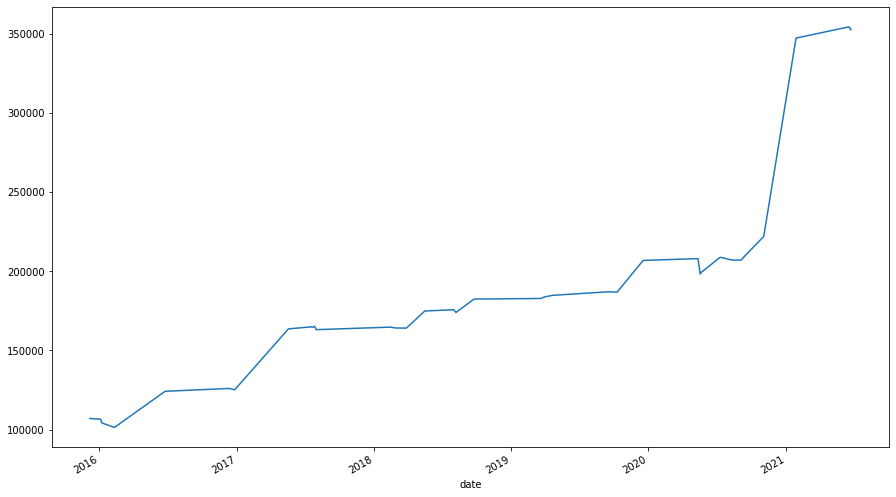

---------------------
873217_TATAELXSI_EQ_NSE_NSE_day.csv
losses (8,)
profit (14,)


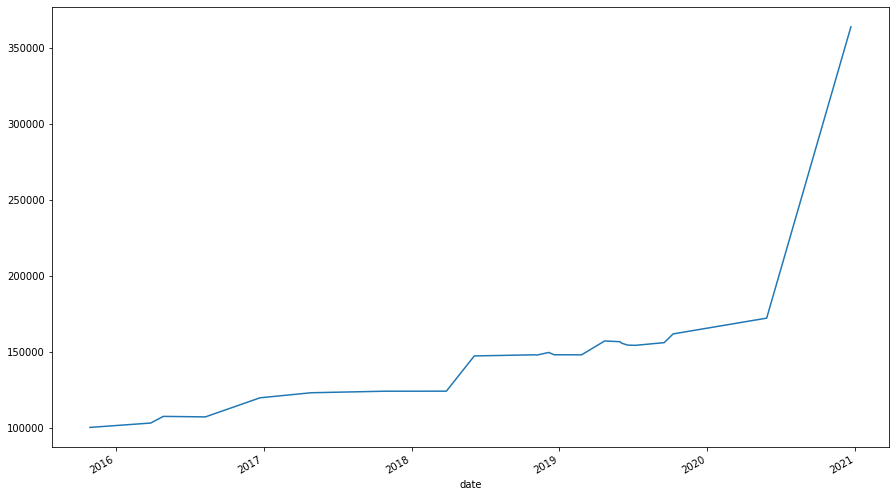

---------------------
876289_TATAMETALI_EQ_NSE_NSE_day.csv
losses (9,)
profit (23,)


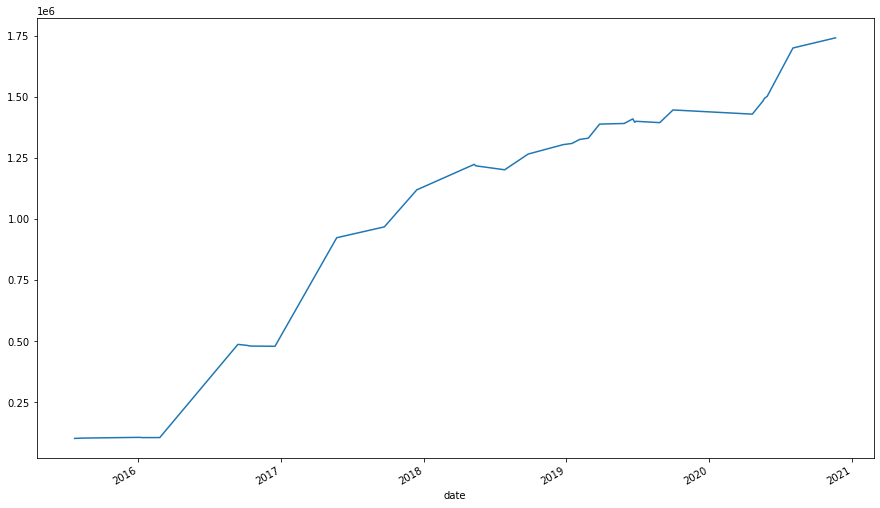

---------------------
877057_TATAPOWER_EQ_NSE_NSE_day.csv
losses (7,)
profit (24,)


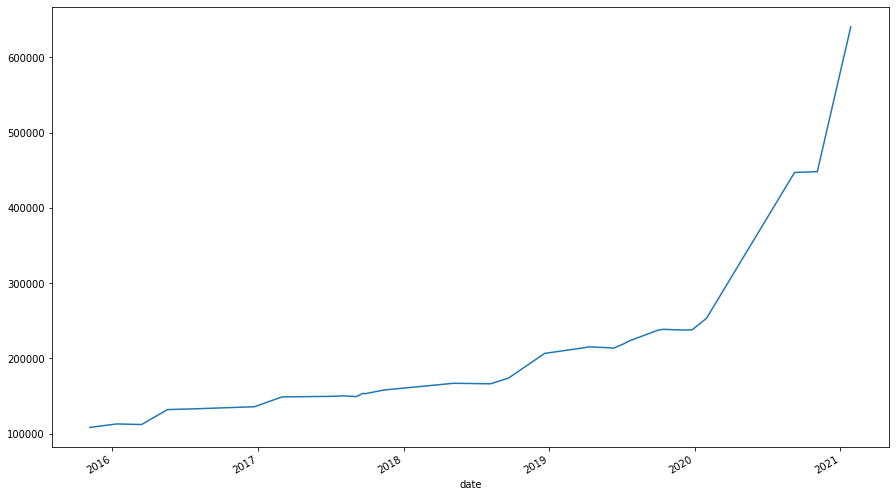

---------------------
878593_TATACONSUM_EQ_NSE_NSE_day.csv
losses (12,)
profit (23,)


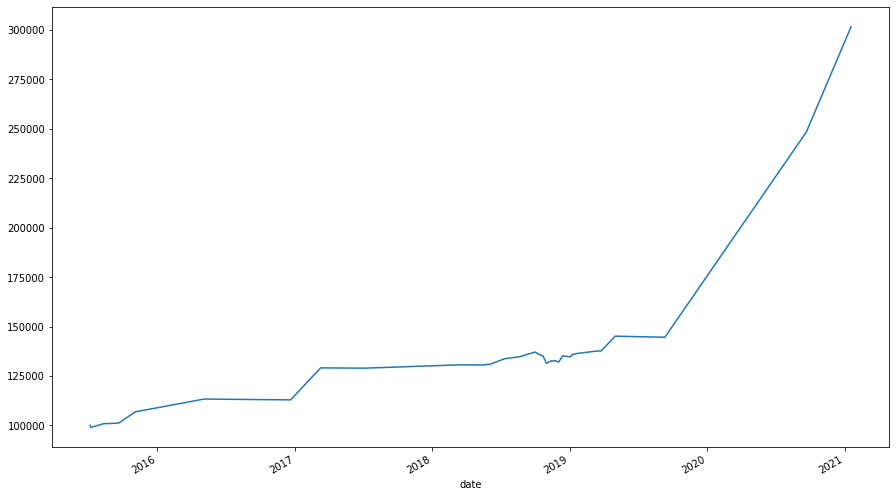

---------------------
884737_TATAMOTORS_EQ_NSE_NSE_day.csv
losses (26,)
profit (20,)


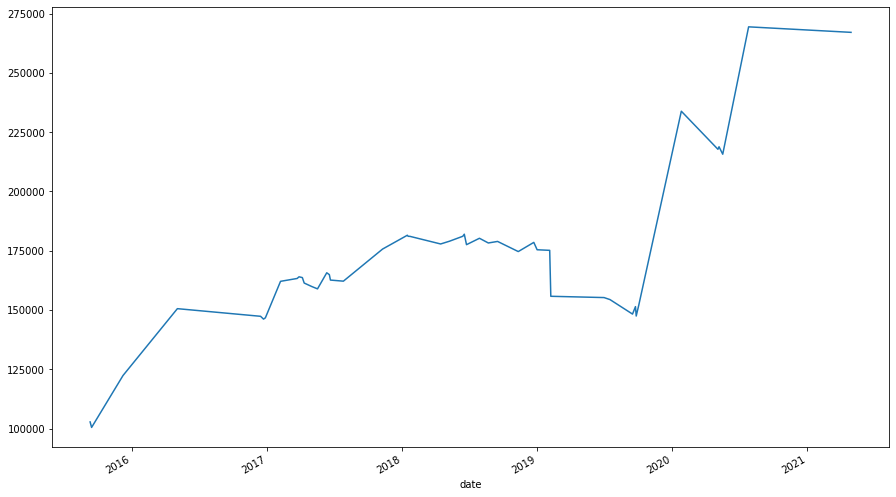

---------------------
895745_TATASTEEL_EQ_NSE_NSE_day.csv
losses (12,)
profit (22,)


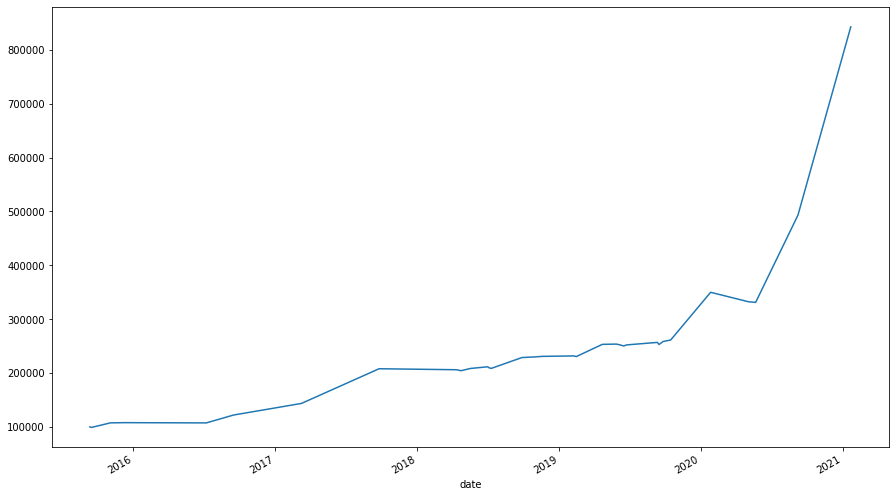

---------------------
952577_TATACOMM_EQ_NSE_NSE_day.csv
losses (12,)
profit (19,)


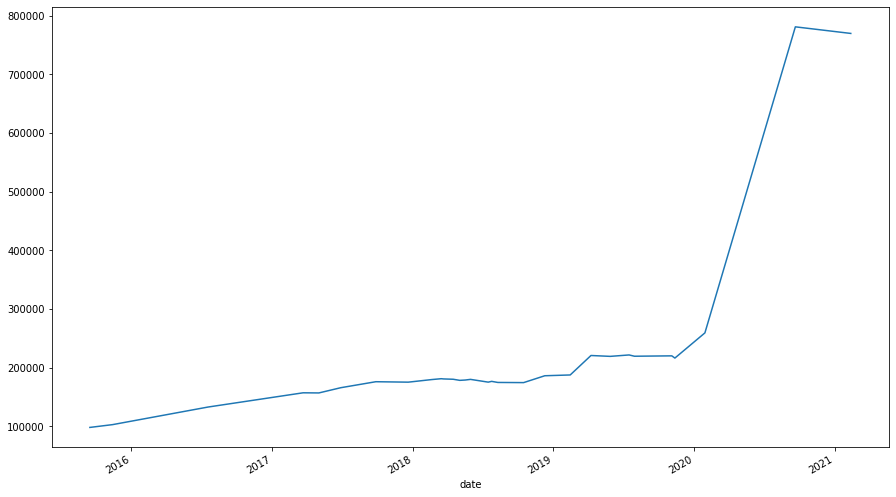

In [12]:
top_profits = df_symbol_summary.sort_values(by=["p&l % per year"], ascending=False).head(40)['symbol'].values
for backtest_symbol_file in os.listdir(os.path.join(BACKTEST_DIR,backtest_strategy_dir)):
    
    
    if backtest_symbol_file not in top_profits:
        continue
    print("---------------------")
    print(backtest_symbol_file)
    df = pd.read_csv(os.path.join(BACKTEST_DIR, backtest_strategy_dir, backtest_symbol_file), index_col="date", parse_dates=True, date_parser=dateutil.parser.parse)
#     df.index_col = 0
#     df.date.astype("datetime")
    df[df['buysell']=='sell']['balance'].plot(figsize=(15,9))
    
    porl = df[df['buysell']=='sell']['balance'].diff()
    print("losses", porl[porl<0].shape)
    print("profit", porl[porl>0].shape)
    pyplot.show()

In [44]:
porl

date
2019-07-05 11:15:00+05:30             NaN
2019-07-05 12:45:00+05:30      255.232606
2019-07-09 12:15:00+05:30       81.889052
2019-07-09 13:15:00+05:30       80.968953
2019-07-09 13:45:00+05:30       53.659333
                                 ...     
2021-06-14 09:15:00+05:30    11025.935704
2021-06-16 09:45:00+05:30    24464.344755
2021-06-16 15:00:00+05:30      783.508915
2021-06-18 09:30:00+05:30     6306.682935
2021-06-18 12:45:00+05:30     5536.272729
Name: balance, Length: 454, dtype: float64